## Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

Boosting is an ensemble learning methodology in which multiple weak learners are trained sequentially to form a strong predictive model. A weak learner is defined as a model that performs only slightly better than random guessing.

In boosting, each model is trained by explicitly focusing on the errors made by the previous models. This is achieved either by reweighting misclassified samples (as in AdaBoost) or by optimizing a loss function using gradient-based methods (as in Gradient Boosting). By iteratively reducing bias and correcting residual errors, boosting improves predictive accuracy and model robustness.

---

## Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

AdaBoost trains models sequentially by assigning higher weights to misclassified observations after each iteration. Subsequent learners prioritize these difficult samples, and final predictions are formed using a weighted majority vote.

Gradient Boosting, on the other hand, formulates boosting as a numerical optimization problem. Each new learner is trained to predict the negative gradient of the loss function with respect to the current model’s predictions. This makes Gradient Boosting more flexible, as it can optimize arbitrary differentiable loss functions for both regression and classification.

---

## Question 3: How does regularization help in XGBoost?

XGBoost integrates regularization directly into its objective function using L1 (Lasso) and L2 (Ridge) penalties. These penalties constrain leaf weights and tree complexity.

Regularization reduces overfitting by discouraging overly complex trees, stabilizing split decisions, and improving generalization. Additionally, XGBoost supports structural regularization through parameters such as maximum depth, minimum child weight, and subsampling, further enhancing model robustness.

---

## Question 4: Why is CatBoost considered efficient for handling categorical data?

CatBoost efficiently handles categorical features by applying ordered target encoding techniques that avoid target leakage. Unlike traditional one-hot encoding, CatBoost transforms categorical values using statistics computed from permutations of the dataset.

This approach preserves information, reduces dimensionality, and prevents overfitting. CatBoost also uses symmetric (oblivious) trees, which improve training speed and inference efficiency, making it particularly effective for datasets with high-cardinality categorical variables.

---

## Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Boosting techniques are preferred in applications where bias reduction and high predictive accuracy are critical. Examples include credit risk assessment, fraud detection, medical diagnosis, recommendation systems, and search ranking.

These problems often involve complex feature interactions and class imbalance, where boosting’s sequential error-correction mechanism outperforms bagging methods such as Random Forests.

---

## Question 6: AdaBoost Classifier on Breast Cancer Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


---

## Question 7: Gradient Boosting Regressor on California Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.7756446042829697


---

## Question 8: XGBoost Classifier with Hyperparameter Tuning

In [7]:
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
grid = GridSearchCV(xgb, param_grid, cv=3)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Params: {'learning_rate': 0.1}
Accuracy: 0.956140350877193


---

## Question 9: CatBoost Classifier and Confusion Matrix

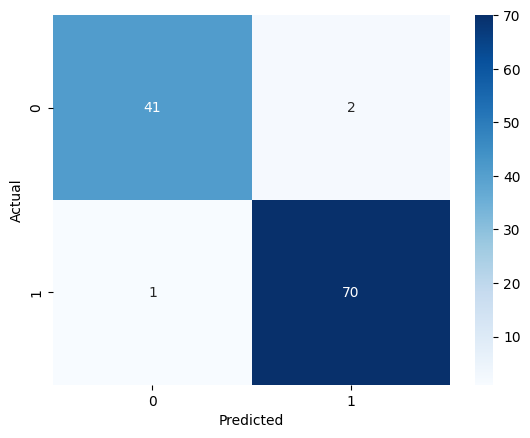

In [10]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

---

## Question 10: FinTech Loan Default Prediction Pipeline

**Data Preprocessing**
- Handle missing values using median imputation for numerical features and a separate category for missing categorical values.
- Encode categorical features using CatBoost’s native handling or target encoding.

**Model Choice**
- Prefer CatBoost or XGBoost due to their robustness to missing values and ability to handle non-linear feature interactions.
- CatBoost is ideal when categorical variables dominate.

**Hyperparameter Tuning**
- Use GridSearchCV or Bayesian Optimization focusing on learning rate, depth, number of trees, and class weights.

**Evaluation Metrics**
- Use ROC-AUC for overall discrimination ability.
- Use Precision-Recall AUC due to class imbalance.
- Monitor recall to minimize false negatives (missed defaulters).

**Business Impact**
- Improved risk assessment reduces financial losses.
- Better default prediction enables optimized loan pricing and approval strategies.
- Regulatory compliance is strengthened through explainable and stable predictions.

---